# Visualizing Earnings Based On College Majors


We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by the American Community Survey, which conducts surveys and aggregates it. FiveThirtyEight cleaned the dataset and released it on their Github repo.
https://github.com/fivethirtyeight/data/tree/master/college-majors

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* **Rank** - Rank by median earnings (this column orders the dataset).
* **Major_code** - Major code.
* **Major** - Major description.
* **Major_category** - Category of major.
* **Total** - Total number of people with major.
* **Sample_size** - Sample size (unweighted) of full-time.
* **Men** - Male graduates.
* **Women** - Female graduates.
* **ShareWomen** - Women as a share of the total.
* **Employed** - Number employed.
* **Median** - Median salary of full-time, year-round workers.
* **Low_wage_jobs** - Number in low-wage service jobs.
* **Full_time** - Number employed 35 hours or more.
* **Part_time** - Number employed less than 35 hours.


Using visualizations, we can start to explore questions from the dataset like:

Do students in more popular majors make more money?
How many majors are predominantly male? Predominantly female?
Which category of majors has the most students?

We'll explore how to do these and more while primarily working in pandas.

Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots are displayed inline
%matplotlib inline

# Read in the dataset into a DataFrame
recent_grads = pd.read_csv("datasets/recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [4]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

The matplotlib library expects that columns of values we pass in have matching lengths. Missing values is going to cause matplotlib to throw errors. We need look up if the number of rows in `recent_grads` and assign the value to `raw_data_count`.

In [5]:
raw_data_count = len(recent_grads.index)
print(str(raw_data_count) + ' rows before dropping null values')


recent_grads.dropna(inplace=True)
raw_data_count_after = len(recent_grads.index)
print(str(raw_data_count_after) + ' rows after dropping null values')

173 rows before dropping null values
172 rows after dropping null values


We're lucky! We've only lost one row out of our 173 rows.

Time to do some plotting. Let's start with scatter plots. We can directly do our plots using method functions at pandas. Let's set our sights at some simple question we can search the answer for. I've got:

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

## Scatter Plots

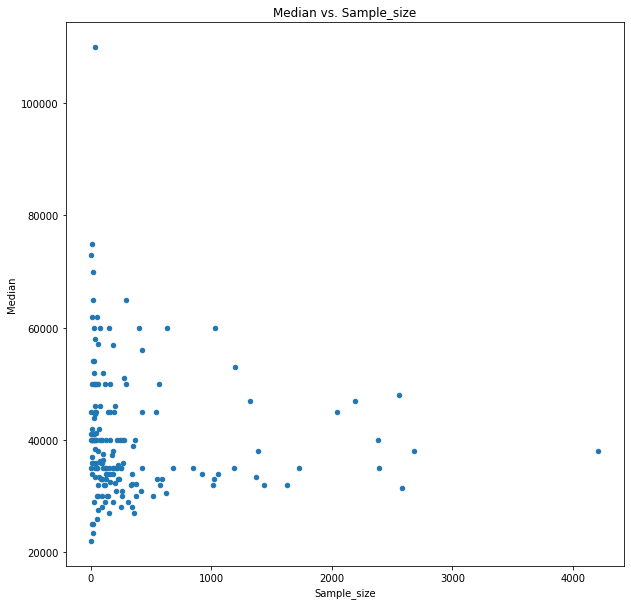

In [6]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Median vs. Sample_size', figsize=(10,10))

As you observe, as sample size increases, there are fewer points. But the average Median value stays roughly the same despite the increase in sample size.

There is no correlation between the increase or decrease in sample size and median earnings. This paints a good picture for our dataset as it eliminates the element of sample size having a bias on our findings.

But first question is therefor answered.

Do students in more popular majors make more money?

The answer is no!

Let's look at Unemployment Rate against Sample Size.

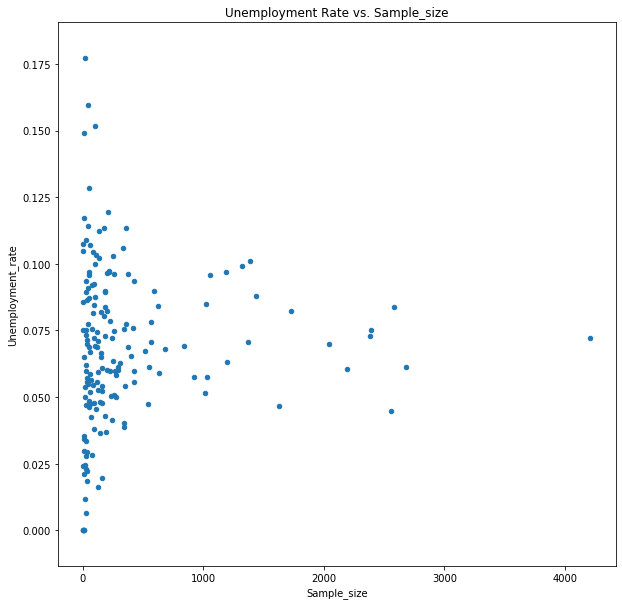

In [7]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Unemployment Rate vs. Sample_size', figsize=(10,10))

Same results as previous. Sample size's increase doesn't have any effect on unemployment rates.

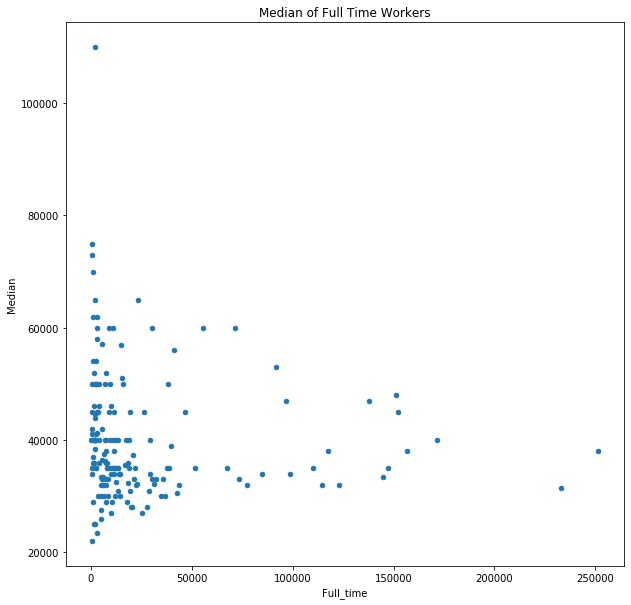

In [8]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Median of Full Time Workers', figsize=(10,10))

Another question get answered right here.

Do number of full time working graduates effect income levels?

This seems like a no as well.

The median value sits at a similar range as full time working graduates increases. So popular majors doesn't mean you will earn better money.

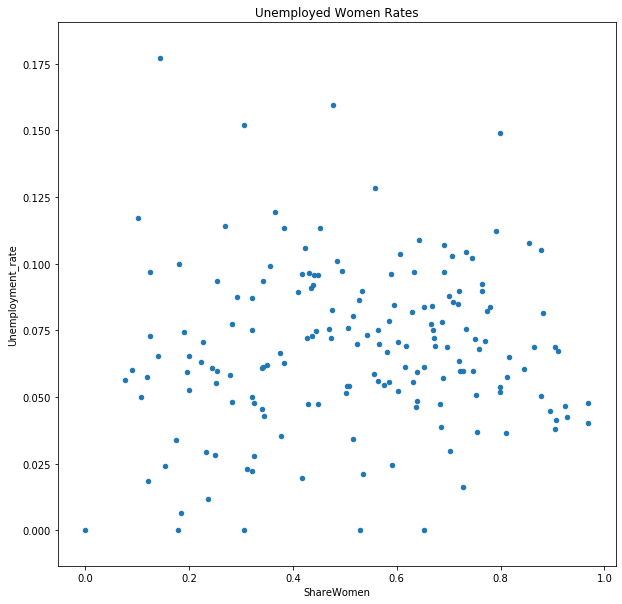

In [9]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Unemployed Women Rates', figsize=(10,10))

Is the unemployment rate effected by if a major is female dominant or not? It's not.

It simply doesn't matter if the major has female or male majority as their students.

The scatterplot is a textbook image for a zero correlation.

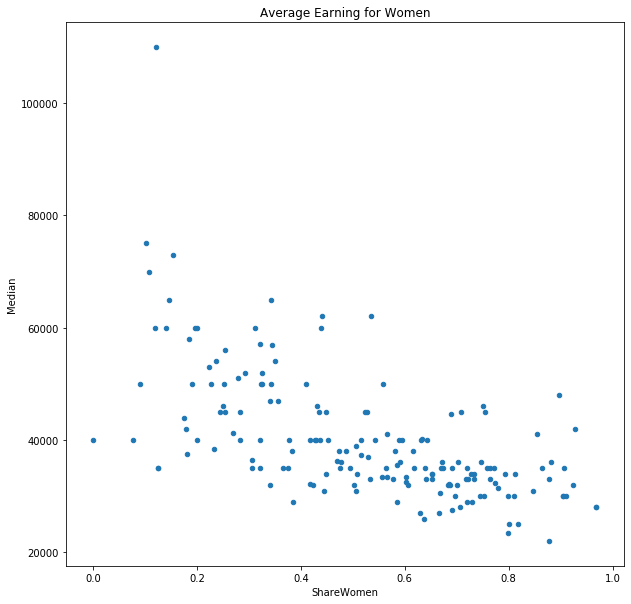

In [10]:
recent_grads.plot(x='ShareWomen', y='Median', kind='scatter', title='Average Earning for Women', figsize=(10,10))

Q. Do students that majored in subjects that were majority female make more money?

A. No. There is a weak negative correlation. The higher the women percentage of a major's, median earnings gets lower.

Since we don't have the data we can't delve deeper. We don't know if this occurs because of gender inequality or the female dominant majors has lower income than average or the womens' propensity to take time for their family and work away or stop working at all.

Let's compare now Men and Women on their earnings:

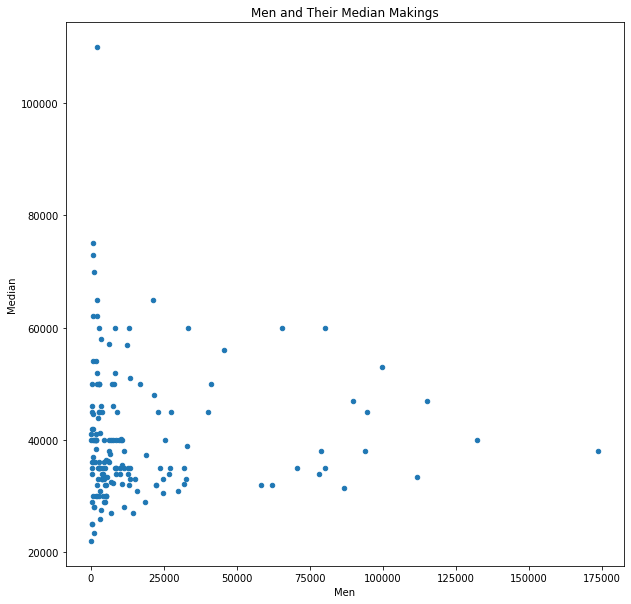

In [11]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men and Their Median Makings', figsize=(10,10))

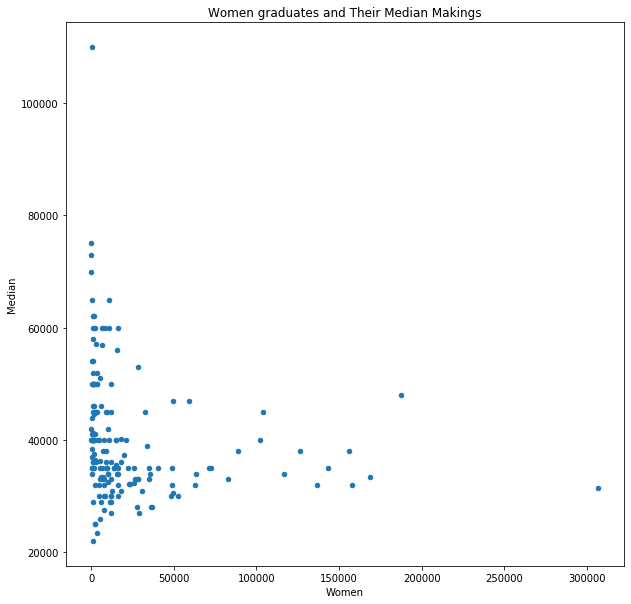

In [12]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women graduates and Their Median Makings', figsize=(10,10))

The number of male or female graduates doesn't correlate to earnings as well.

This was the case for share of women plot as well. So gender wise earnings seem pretty neutral.

## Histograms

We've find ourselves the answers to our questions. But we've got more techniques we need to show off so we need more questions! Histograms are good for distributions. So our answers should be related to such problems. I've got:

    * What percent of majors are predominantly male? Female?
    * What's the most common median salary range?

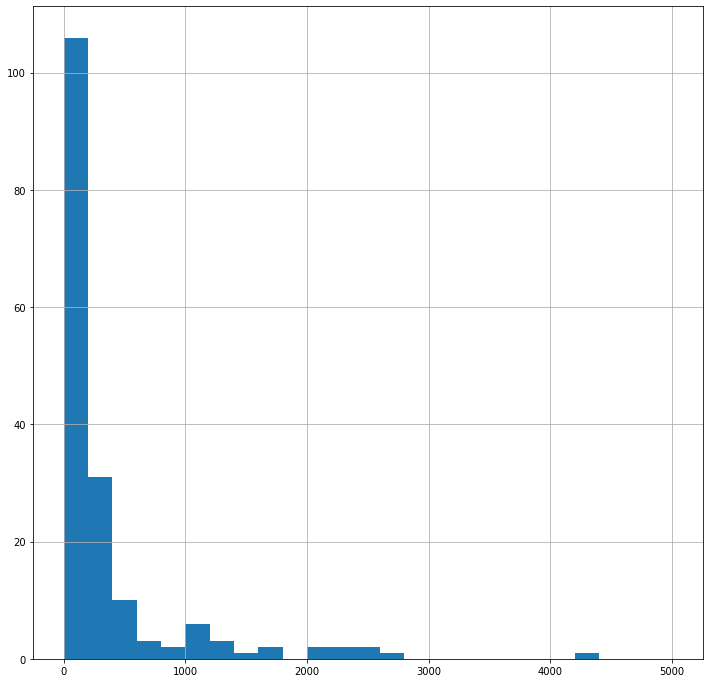

In [13]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000),figsize=(12,12))

The vast majority of our sample sizes are below 600 mark. The number of samples grow considerably thin after the 600 mark. So most of our samples are smaller than 600, With high majority being under the 200 mark.

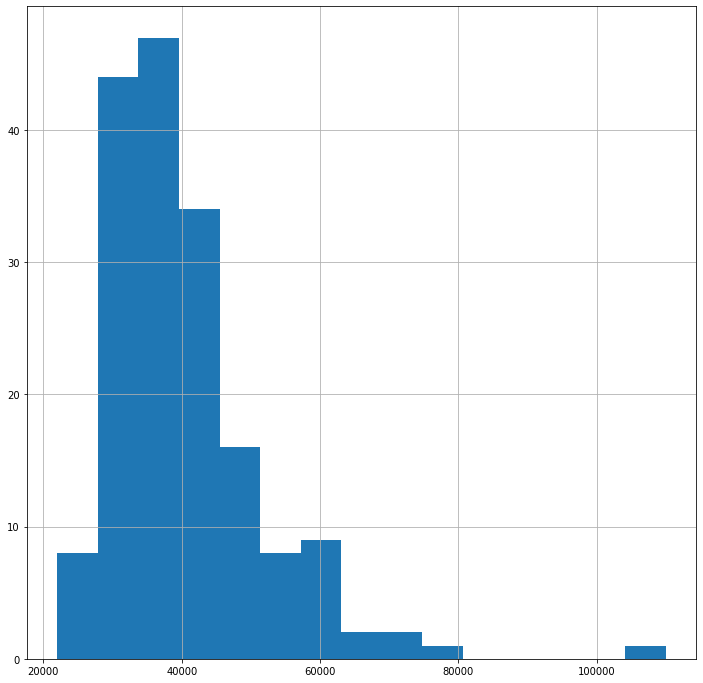

In [14]:
recent_grads['Median'].hist(bins=15,figsize=(12,12))

What's the most common range for average earnings?

Average earning sits between 34.000 and 40.000, with the data centered at the second bin of 30k to 40k range. It's closer to 35k mark.

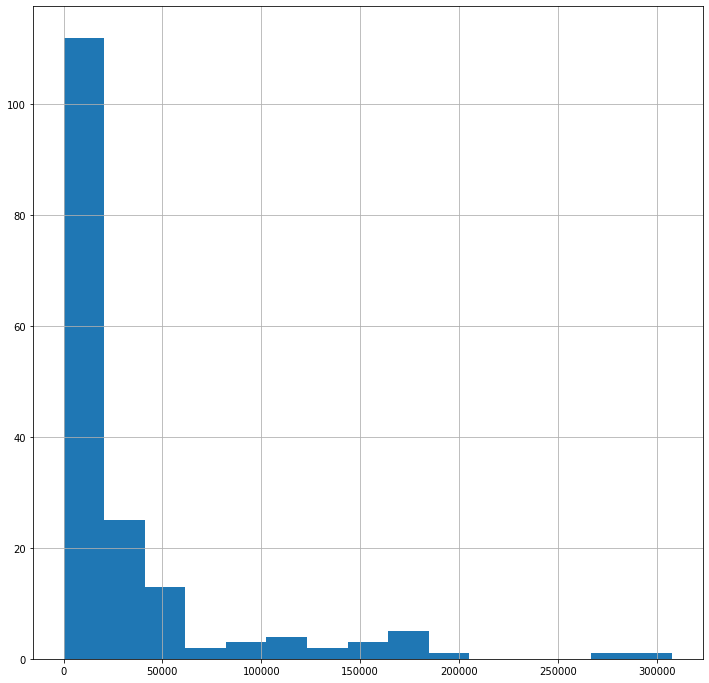

In [15]:
recent_grads['Employed'].hist(bins=15,figsize=(12,12))

The number employed per major may be effected by two things. The major itself and the amount of graduates it has. To further check our assumption we can plot the Total and Employeed column.

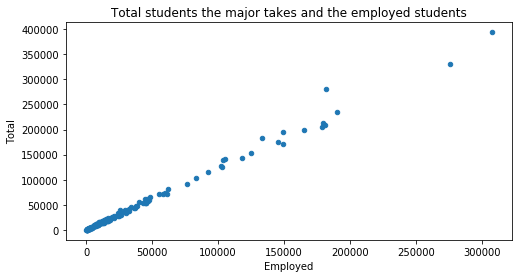

In [16]:
recent_grads.plot(x='Employed', y='Total', kind='scatter', title='Total students the major takes and the employed students', figsize=(8,4))

As assumed Employed column is a bit tricky and doesn't hold much value on it's own. As it's value is directly correlated with the amount of students a major takes in every season.

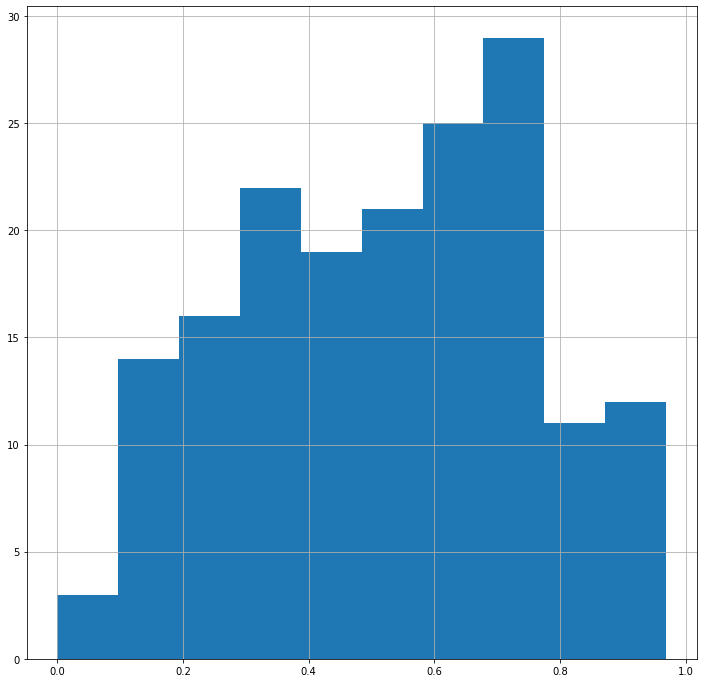

In [17]:
recent_grads['ShareWomen'].hist(bins=10,figsize=(12,12))

Share of women graduates by major seems to be normall distributed. Although we have to note that there is more predominantly female majors then there is for males. So it's skewed to the right, however, the amount isn't anything significant.

## Combining the two graphs: Scatter Matrix

These technique does both histograms and scatter plots on a single plot.

In [18]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D48EC31F60>,
      dtype=object)

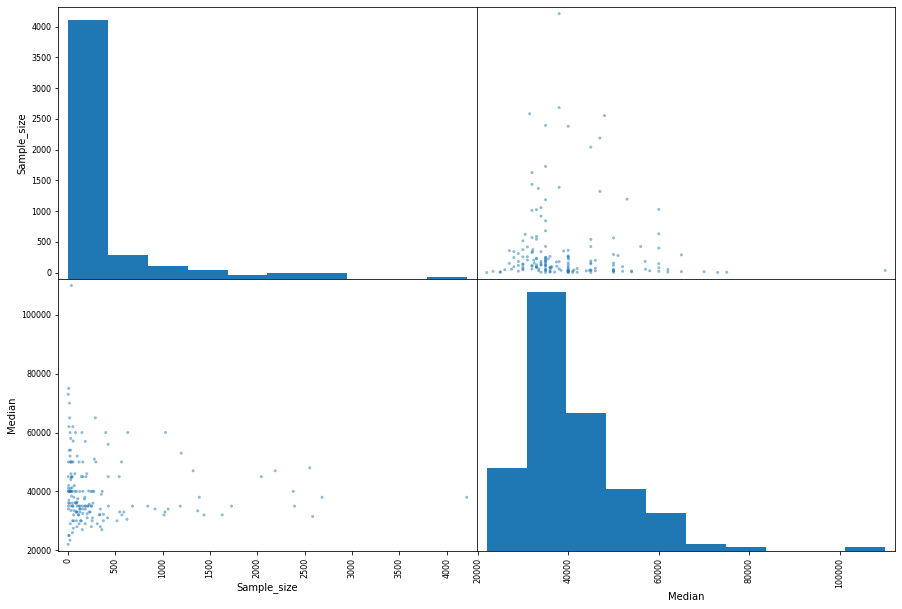

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(15, 10))

As we've observed the most sample sizes are less than 500.

The scatter plot of Sample Size vs Median Salary doesn't provide any value. However, the scatter plot of Median_salary vs Sample_size does show that higher sample sizes stand between 30.000 and 40.000$ range, which are in lane with the most common salary ranges.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D48F7C1898>,
      dtype=object)

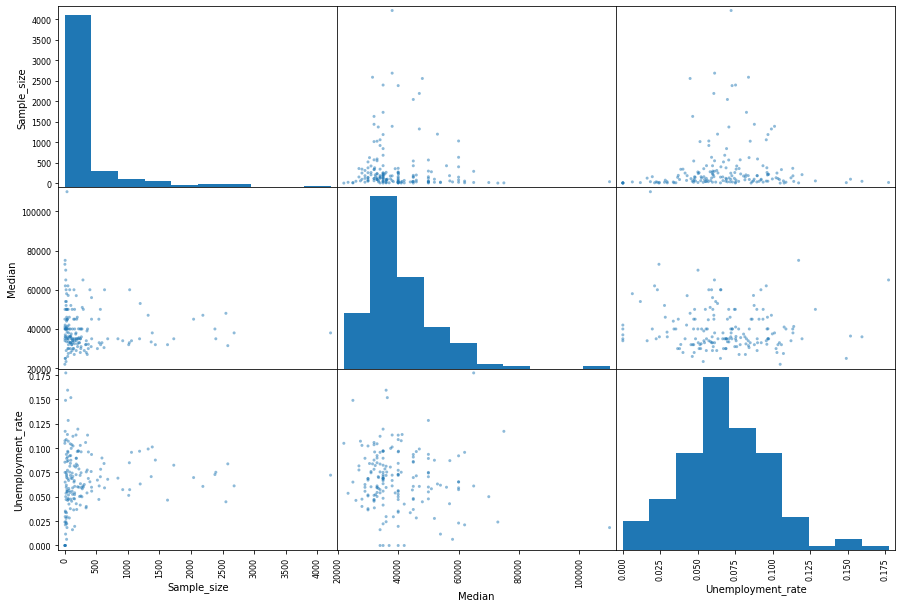

In [20]:
scatter_matrix(recent_grads[['Sample_size', 'Median',"Unemployment_rate"]], figsize=(15,10))

Unfortunately there isn't anything worth our time here. But the thing is, we know that now.

The scatter matrix plots are a quick way to show this. They buy us our valuable time and they do it quick!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4910C1C50>,
      dtype=object)

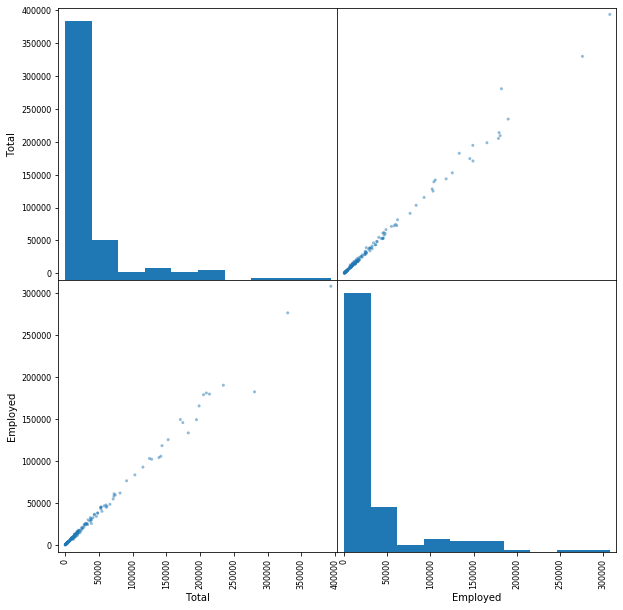

In [21]:
# Total and Employed scatter matrix
scatter_matrix(recent_grads[["Total", "Employed"]], figsize=(10,10))

We'd see Employed column is dependent of Total faster and easier with them!

## Bar Plots

They are very good for comparing values side by side.

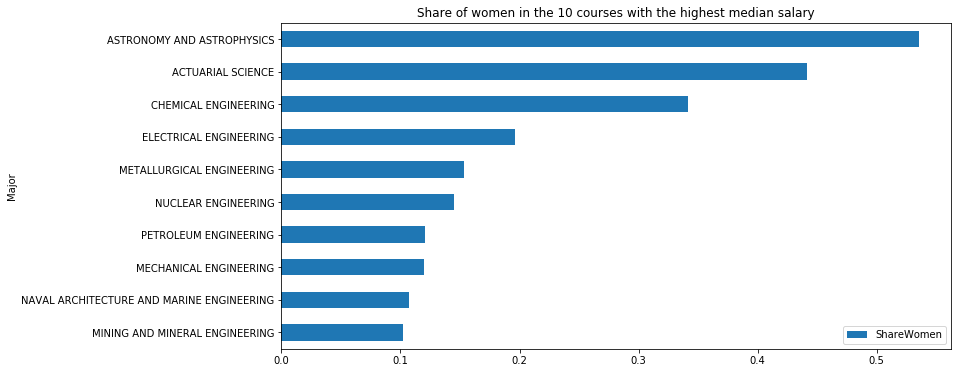

In [34]:
# Share of women in the top 10 courses 
( recent_grads[:10].sort_values('ShareWomen').plot.barh(x='Major', y='ShareWomen',
                             title='Share of women in the 10 courses with the highest median salary', figsize=(12,6))
)

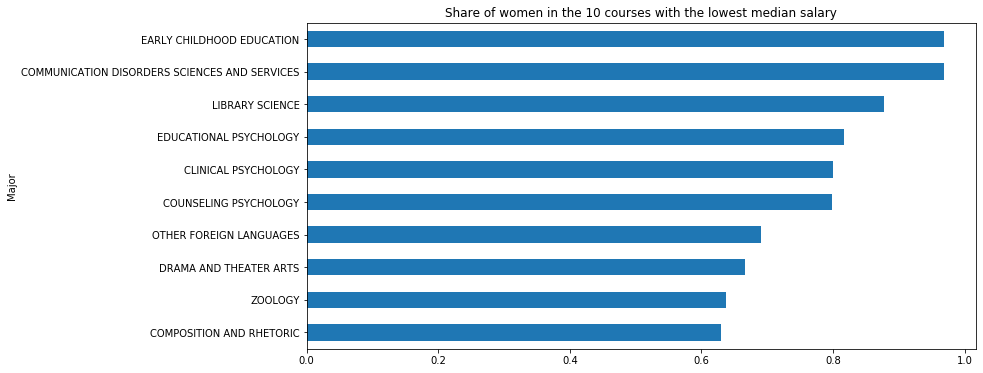

In [36]:
# Share of women in the bottom 10 courses 
( recent_grads[-10:].sort_values('ShareWomen').plot.barh(x='Major', y='ShareWomen',
                              title='Share of women in the 10 courses with the lowest median salary', figsize=(12,6)
                             ,legend=False)
)

Share of women is considerably higher in the lowest median salary.

Women's share is low in highest median salary majors as well. Why could that be?

It's beyond our scope. We can calculate the difference though:

In [56]:
print("The top 10 highest paying majors have an average female share of {}".format(recent_grads.loc[:9, "ShareWomen"].mean()))
print("The top 10 lowest paying majors have an average female share of {}".format(recent_grads[-10:]['ShareWomen'].mean()))

The top 10 highest paying majors have an average female share of 0.226244326
The top 10 lowest paying majors have an average female share of 0.7853643873999999


The difference in the average proportion of female graduates between top 10 and bottom 10 courses (in terms of salaries) is over %50. Since this is a good subject we've run into we can extend our analysis towards different subjects.

Let's look at the difference in unemployment rate now.

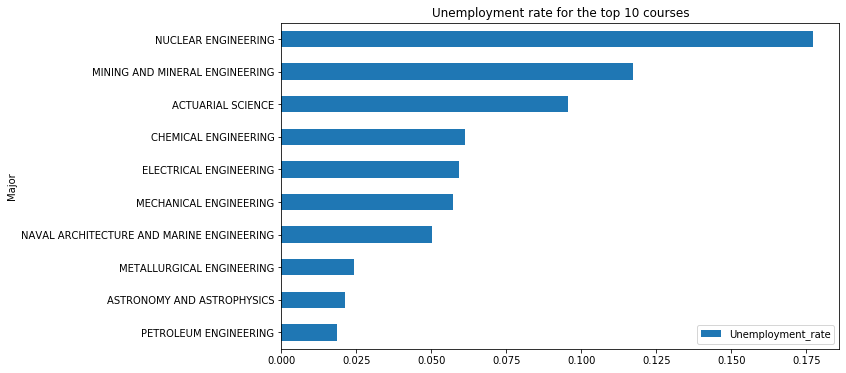

In [65]:
( recent_grads[:10].sort_values('Unemployment_rate').plot.barh(x='Major', y='Unemployment_rate',
                                                               title='Unemployment rate for the top 10 courses', figsize=(10,6))
)

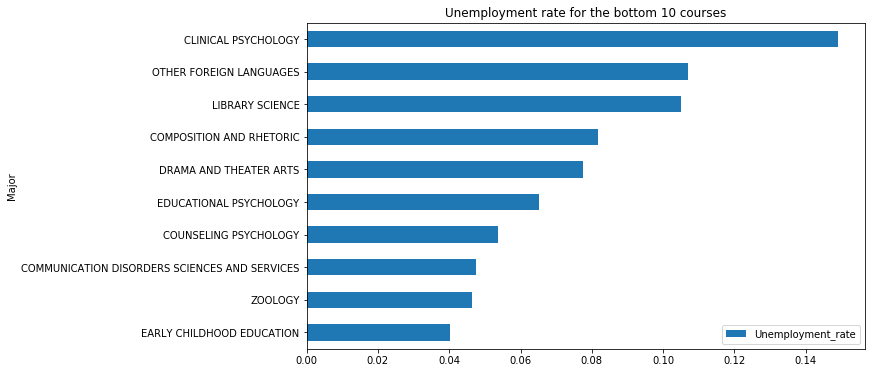

In [64]:
( recent_grads[-10:].sort_values('Unemployment_rate').plot.barh(x='Major', y='Unemployment_rate',
                                                        title='Unemployment rate for the bottom 10 courses', figsize=(10,6))
)

The difference is less clear visually. We better calculate the mean to better compare the differences!

In [69]:
print("The average unemployment rate across all majors is {:.2f}".format(recent_grads['Unemployment_rate'].mean()))
print("The average unemployment rate for the top 10 majors is {:.2f}".format(recent_grads[:9]['Unemployment_rate'].mean()))
print("The average unemployment rate across all majors is {:.2f}".format(recent_grads[-10:]['Unemployment_rate'].mean()))

The average unemployment rate across all majors is 0.07
The average unemployment rate for the top 10 majors is 0.07
The average unemployment rate across all majors is 0.08


The difference isn't anything significant after all!

The highest and lowest paying majors (jobs) have on average the same unemployment rate. Some of the single majors may have above average values. But we see no value in plotting them to see how the average unemployment rate is effect for each major.

Since we're interested in the average between top and bottom 10, we extracted the information we needed.

In [72]:
"""
We stop using basics now and employ group by instead of manually creating dictionaries,
converting them to series then adding them as our columns to our data frame.
""""
grouped = recent_grads.groupby('Major_category')[['Unemployment_rate','ShareWomen','Median','Women','Men']].mean()
grouped

,Unemployment_rate,ShareWomen,Median,Women,Men
Major_category,,,,,
Agriculture & Natural Resources,0.051817,0.405267,35111.111111,3918.111111,4484.111111
Arts,0.090173,0.603658,33062.500000,27842.500000,16798.750000
Biology & Life Science,0.060918,0.587193,36421.428571,19210.214286,13208.500000
Business,0.071064,0.483198,43538.461538,48809.538462,51373.230769
Communications & Journalism,0.075538,0.658384,34500.000000,65170.000000,32980.250000
Computers & Mathematics,0.084256,0.311772,42745.454545,8207.545455,18975.000000
Education,0.051702,0.748507,32350.000000,28475.187500,6470.375000
Engineering,0.063334,0.238889,57382.758621,4457.793103,14079.551724
Health,0.065920,0.795152,36825.000000,32309.416667,6293.083333


Now let's do some plotting!

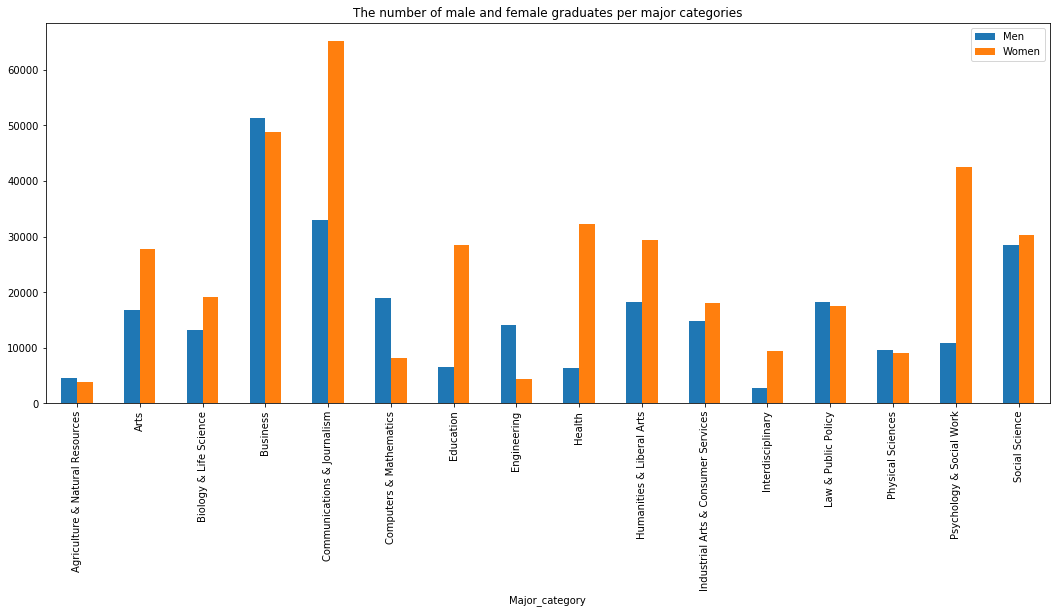

In [77]:
grouped[['Men','Women']].plot.bar(figsize=(18,7), title='The number of male and female graduates per major categories')

There are some columns with high gaps in them. The gender gap is highest in the following categories:

* Education
* Engineering
* Health
* Humanities & Liberal Arts
* Psychology & Social Work



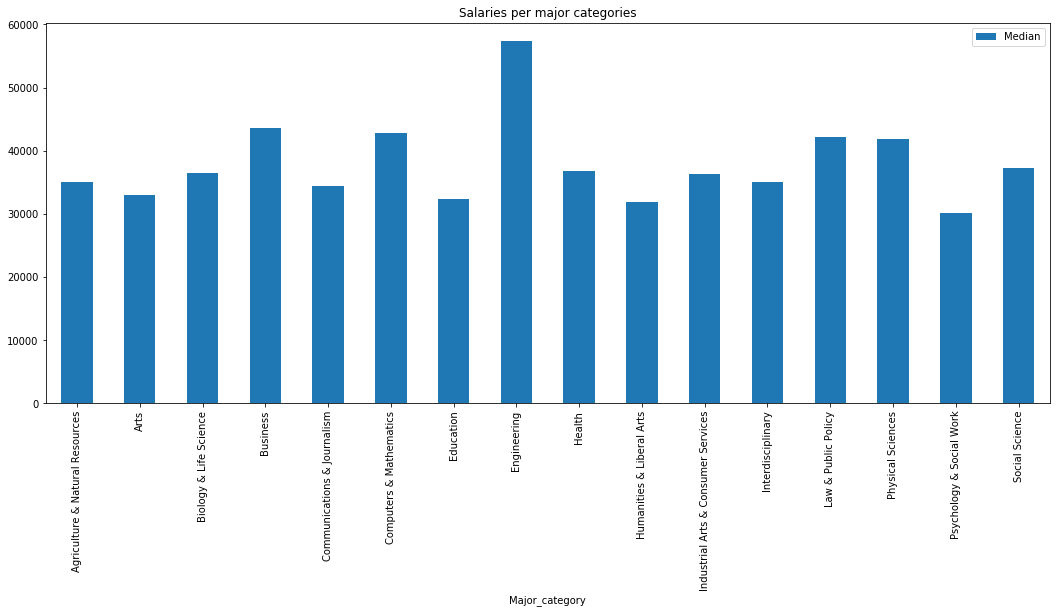

In [79]:
grouped[['Median']].plot.bar(figsize=(18,7), title='Salaries per major categories')

The plot clearly demonstrates Engineering is the highest paying category by far. 

But for this purposes we believe one should focus on majors. As graduates don't graduate from a category but the major itself. For example the Health category probably has very diverse average salaries in it when compared by the majors in it.